### Projet informatique:
# Prédiction des variations de prix sur le marché des cryptomonnaies
 
#### Ilies El Jaouhari, Samuel Bazaz Jazayeri, Thomas Salomon





# Introduction

Dans le cadre du projet d'informatique de 1ère année, nous avons eu pour objectif d'utiliser nos connaissance de 1A pour prédire les tendances d'un d'un marché financier. L'idée initiale était d'appliquer les modèles vus en cours d'éconophysique afin de les tester. Le marché financier comme domaine d'application a été choisit pour des raisons de practicité. Nous pensions que les données étaient suffisament concéquentes et accessible pour programmer un algorithme pertinent. Malheureusement comme on le vera par la suite, les données nécessaire au modèle de Langevin d'éconophysique sont extrêmement difficile à obtenir car en générale très cher, réservées à des professionelles de la finance.

Nous avons essayé toutefois sur le Bitcoin et l'EUR/USD dont on a trouvé les données après de longues recheches. Après une étude de ces cours nous avons constaté que ces dernières ne vérifiaient pas un critère de linéarité nécéssaire à l'application du modèle. Dans l'impasse nous nous sommes alors résigner à changer de piste. 

Nous avons alors entendu parlé d'une nouvelle librairie de Facebook apparue en Janvier 2020: Prophet. Nous détaillerons plus tard son principe, mais à ce stade nous avons décidé d'optimiser les hyperparametres par du machine learning pour la prédiction sur les cryptomonnaies. En effet dans notre quète d'obtenir une base de donnée détaillé pour le modèle de Langevin, nous avons récupéré les cours de 22 crypto monnaies. 

# I. Principe du modèle de Langevin 



### Il y a des preuves empirique de l'exitence pour certains cours boursier d'un interval de volume d'échange, pour lequel on a une relation linéaire entre le "trade imbalance", c'est à dire la différence entre le volume d'unités achetés et vendus, et la variation de prix entre deux temps données.  


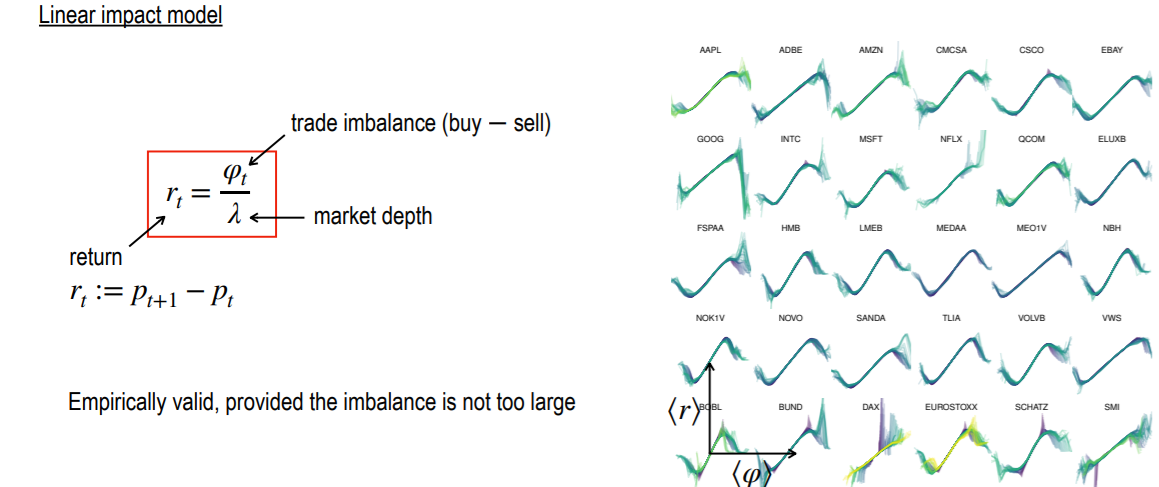

###Dans ces conditions il est alors possible de lier l'évolution des prix à l'état des stock d'obligation. Or des études éconophysiques on cherché à modéliser l'évolution des du "trade imbalance" à travers l'équation suivante:

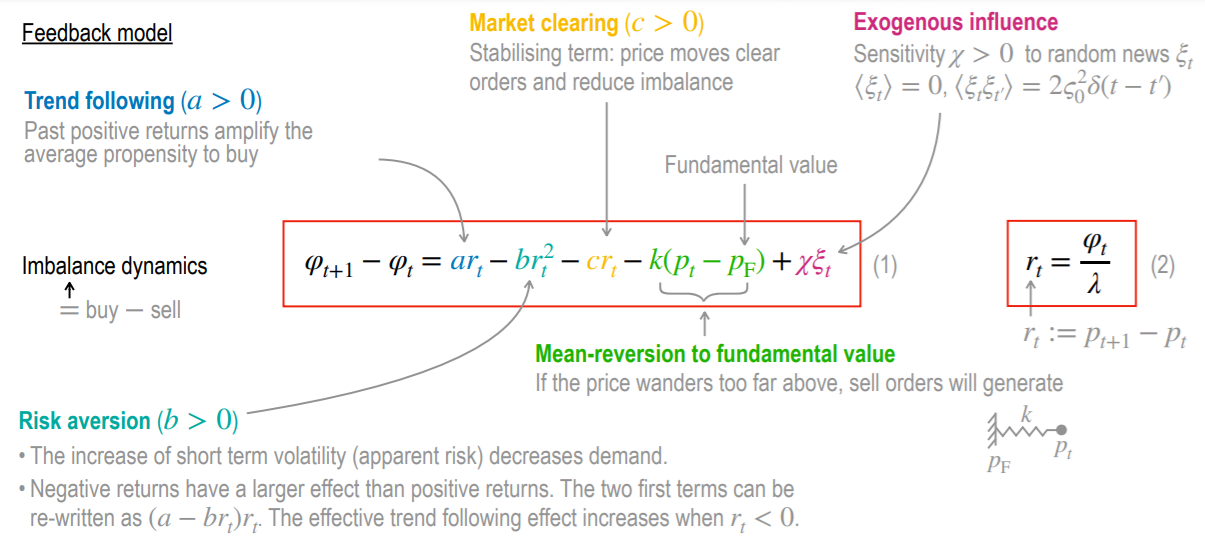

### Considérant le potentiel du trade imbalance à la manière d'un physicien, il est alors possible de prédire les tendances du marché par étude de ses puits. Chaque puits sont en effet associés à un état du marché et la dynamique du trade imbalance en découle.  

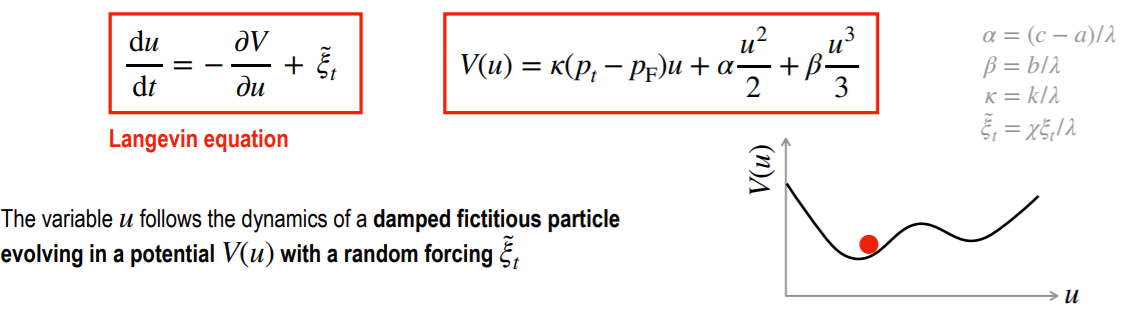

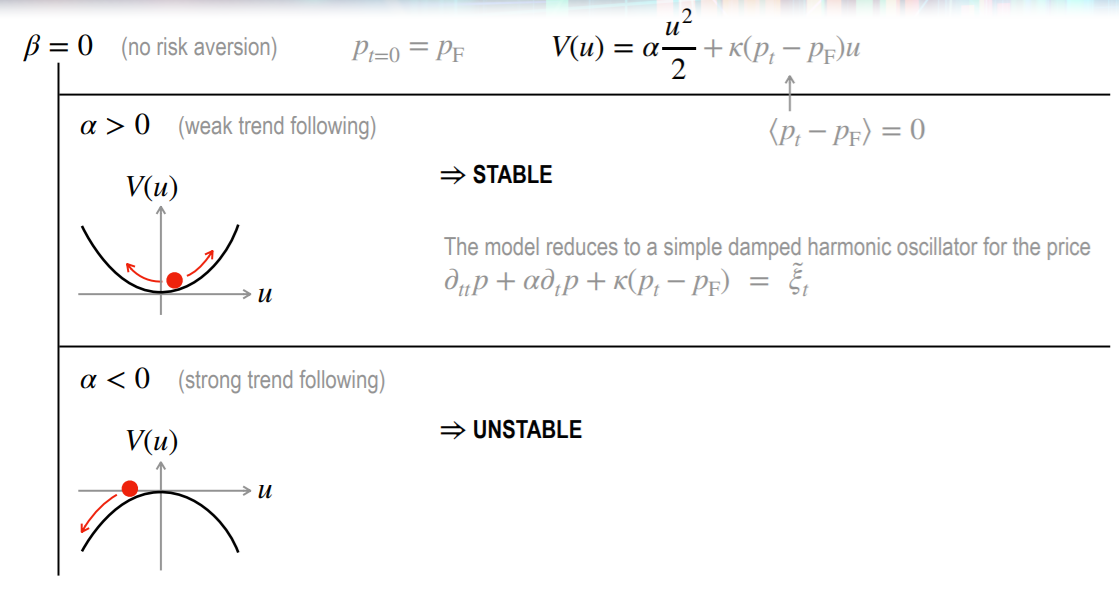

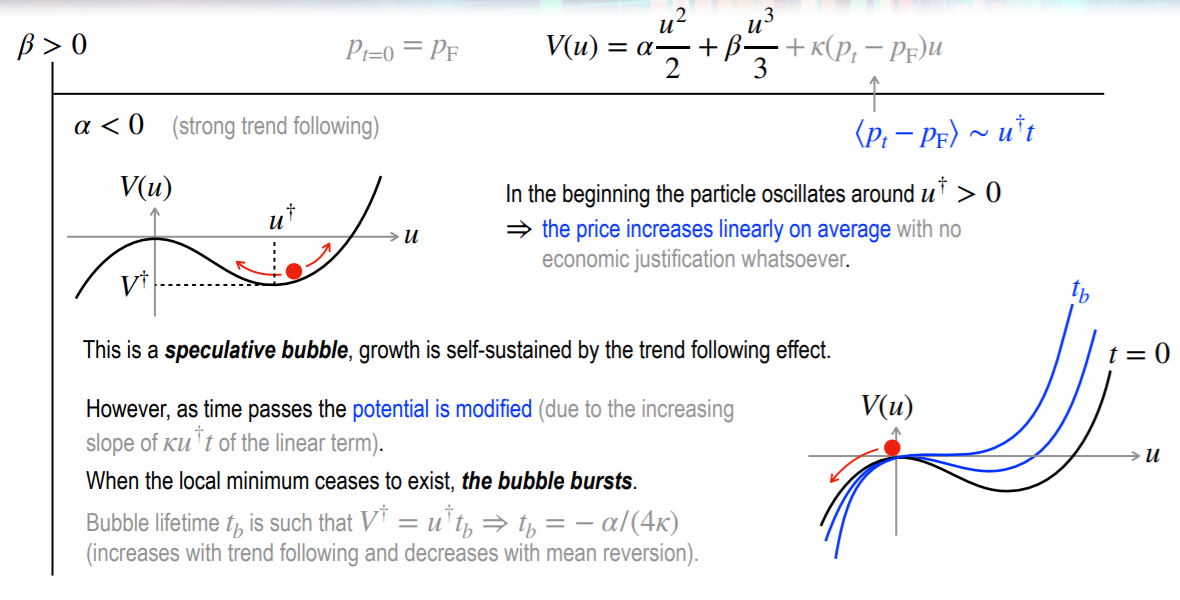

### Démarche et Limites:

L'objectif était donc de trouver un cours et un intervalle de "trade imbalance" pour lequel on avait la relation linéaire. Puis d'estimer les paramètres du potentiel du "trade imbalance" par un algorithme de deeplearning.

Cependant les volume vendus et achetés sont des données très rarement gratuites. Nous avons trouvé pour le Bitcoin et l'EUR/USD mais l'intervale de linéarité n'a jamais été trouvé pour ces cours. Nous détaillerons par la suite le code de cette recherche infructueuse. 

# II Recherche de l'intervalle de linéarité pour le Bitcoin et l'EUR/USD

In [3]:
import pandas_datareader as pdr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import ipywidgets as widgets
import seaborn as sn
import mplfinance as mpl

#### Nous allons tout d'abords tenter de récuperer une matrice de corrélation des rendements de 22 cryptomonnaies afin de construire le portefeuille le plus diversifié possible

### Récuperation des données

In [4]:
Cryptos = ["BTC","LTC","NMC","PPC","DOGE","GRC","XPM","XRP","NXT","AUR","DASH",
           "NEO","MZC","XMR","TIT","XVG","XLM","VTC","ETH","ETC","Nano","USDT"
          ,"ZEC","BCH","EOS","ADA"]

In [5]:
Cryptos

['BTC',
 'LTC',
 'NMC',
 'PPC',
 'DOGE',
 'GRC',
 'XPM',
 'XRP',
 'NXT',
 'AUR',
 'DASH',
 'NEO',
 'MZC',
 'XMR',
 'TIT',
 'XVG',
 'XLM',
 'VTC',
 'ETH',
 'ETC',
 'Nano',
 'USDT',
 'ZEC',
 'BCH',
 'EOS',
 'ADA']

##### Récuperation des données de Yahoo Finance 

In [6]:
Cryptos = [ Crypto + '-USD' for Crypto in Cryptos]

In [7]:
start_date = pd.to_datetime('2021-04-01')
end_date = pd.to_datetime('2021-04-13')

In [8]:
start_date = pd.to_datetime('2021-04-01')
end_date = pd.to_datetime('2021-04-13')
dfex = pdr.DataReader('BTC-USD', 'yahoo', start_date, end_date)['Adj Close']
print(dfex.index)

DatetimeIndex(['2021-03-31', '2021-04-01', '2021-04-02', '2021-04-03',
               '2021-04-04', '2021-04-05', '2021-04-06', '2021-04-07',
               '2021-04-08', '2021-04-09', '2021-04-10', '2021-04-11',
               '2021-04-12', '2021-04-13'],
              dtype='datetime64[ns]', name='Date', freq=None)


<AxesSubplot:xlabel='Date'>

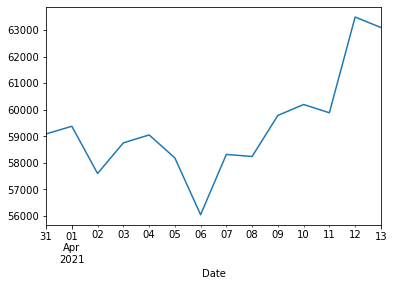

In [9]:
dfex.plot(y='BTC-USD')

In [11]:
# On identifie les cryptos de la base de donnée
for Crypto in Cryptos:
    print(Crypto) 
    try :
        #Afin d'éviter les erreurs liées au possible manque de données de Yahoo Finance
        df1 = pdr.DataReader(Crypto, 'yahoo', start_date, end_date)['Adj Close'] 
        df[Crypto] = df1
    except:
        print("Not in the database...")

    
    

BTC-USD
LTC-USD
NMC-USD
PPC-USD
DOGE-USD
GRC-USD
XPM-USD
Not in the database...
XRP-USD
NXT-USD
AUR-USD
Not in the database...
DASH-USD
NEO-USD
MZC-USD
Not in the database...
XMR-USD
TIT-USD
Not in the database...
XVG-USD
XLM-USD
VTC-USD
ETH-USD
ETC-USD
Nano-USD
USDT-USD
ZEC-USD
BCH-USD
EOS-USD
ADA-USD


# III. Evaluation des corrélations entre Cryptos

In [12]:
df.head()
df.dropna(axis=1, inplace=True)
df.head()

,BTC-USD,LTC-USD,NMC-USD,PPC-USD,DOGE-USD,GRC-USD,XRP-USD,NXT-USD,DASH-USD,NEO-USD,...,XLM-USD,VTC-USD,ETH-USD,ETC-USD,Nano-USD,USDT-USD,ZEC-USD,BCH-USD,EOS-USD,ADA-USD
Date,,,,,,,,,,,,,,,,,,,,,
2021-03-31,59095.808594,204.112518,1.582701,0.628907,0.061986,0.010107,0.579292,0.057121,234.102493,52.972775,...,0.432512,0.667255,1977.276855,14.410887,5.124625,1.000464,164.196930,561.658264,5.622708,1.189244
2021-04-01,59384.312500,213.228394,1.565130,0.635893,0.057664,0.010215,0.616569,0.054327,245.212143,53.351421,...,0.446585,0.670817,2143.225586,15.288599,5.121492,1.000576,169.828842,585.707458,6.298630,1.196509
2021-04-02,57603.890625,197.148209,1.524102,0.737781,0.055804,0.010199,0.590915,0.052557,224.995758,51.256115,...,0.418054,0.664507,2028.422485,13.665507,5.045350,1.003085,173.170975,536.678833,5.453809,1.173277
2021-04-03,58758.554688,204.042908,1.479905,0.719075,0.057404,0.010008,0.646729,0.059546,272.314758,54.735817,...,0.437807,0.672103,2093.122803,14.617213,5.413962,1.003402,188.839172,566.513062,6.348459,1.191420
2021-04-04,59057.878906,221.069046,1.585122,0.703942,0.059696,0.010768,0.920473,0.065705,273.768616,59.033012,...,0.536367,0.741688,2107.887207,16.127941,5.686299,1.000254,196.653732,648.560974,6.707277,1.214300


#### On étudie les corrélations pour déterminer les cryptos à choisir pour le portefeuille 

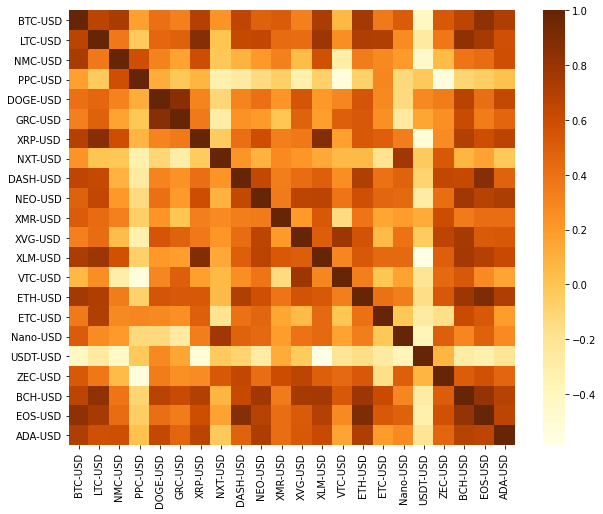

In [16]:
plt.figure(figsize=(10,8))
sn.heatmap(normalized_df.cov(), fmt='g', cmap="YlOrBr")
plt.show()

In [23]:
cov = normalized_df.cov()
cov.sum()/22

BTC-USD     0.498815
LTC-USD     0.497564
NMC-USD     0.296909
PPC-USD    -0.018923
DOGE-USD    0.382004
GRC-USD     0.310772
XRP-USD     0.441469
NXT-USD     0.128277
DASH-USD    0.435479
NEO-USD     0.455541
XMR-USD     0.317081
XVG-USD     0.412809
XLM-USD     0.469356
VTC-USD     0.216759
ETH-USD     0.502699
ETC-USD     0.285739
Nano-USD    0.282292
USDT-USD   -0.130675
ZEC-USD     0.388018
BCH-USD     0.548518
EOS-USD     0.527741
ADA-USD     0.470773
dtype: float64

##### En prenant donc 2 cryptomonnaies qui répliquent bien le marché et 2 qui possèdent de faible corrélation, on évite ainsi d'additionner les risques au sein de notre portefeuille ("Don't put all your eggs in one basket")

Ici on peut donc choisir l'ETH et le BCH ainsi que le PPC et l'USDT.

# IV. Prédiction avec Facebook Prophet et tuning des hyperparamètres

In [1]:
!pip install prophet

  Using cached prophet-1.0.1.tar.gz (65 kB)
  Created wheel for prophet: filename=prophet-1.0.1-py3-none-any.whl size=526435 sha256=caca67b2c7d30bfaf5ed14615889eba7a2650d665d89e202b0bc11d9fb08fe84
  Stored in directory: c:\users\samud\appdata\local\pip\cache\wheels\68\41\51\ce6539f488af8db6de0ebc548542f69ccc16963086998b2993
Successfully built prophet


### Importation des packages

In [1]:
import prophet as pht
import pandas_datareader as pdr
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import ipywidgets as widgets
import seaborn as sn
import mplfinance as mpl
from prophet.diagnostics import performance_metrics
from fbprophet.diagnostics import cross_validation
from prophet.plot import plot_cross_validation_metric
import time as t
from tqdm import tqdm

### Importation des données du ETH/USD dans le dataframe df puis calcul de la série différentielle normalisée

In [21]:

start_date = pd.to_datetime('2021-02-13')
end_date = pd.to_datetime('2021-04-13')


df = pdr.DataReader("ETH-USD",'yahoo',start_date,end_date)

df.reset_index(inplace=True)
df = df[['Adj Close','Date']]
df.rename({"Date": "ds", "Adj Close": "prix"},axis=1,inplace=True)
df['ds'] = df['ds'].apply(pd.to_datetime)
df['ynorm']=(df['prix']-df['prix'].mean())/df['prix'].std()
df['y']=df['ynorm'].diff()


In [27]:
df

,prix,ds,ynorm,y
0,1814.109863,2021-02-13,-0.038125,NaN
1,1805.084106,2021-02-14,-0.079514,-0.041390
2,1779.791016,2021-02-15,-0.195501,-0.115987
3,1781.067505,2021-02-16,-0.189648,0.005854
4,1848.458252,2021-02-17,0.119388,0.309036
...,...,...,...,...
56,2135.942139,2021-04-09,1.437710,0.292722
57,2157.656982,2021-04-10,1.537289,0.099578
58,2139.353271,2021-04-11,1.453353,-0.083936
59,2299.187744,2021-04-12,2.186310,0.732957


#### Prophet est une librairie open source (R et Python) de prévision des données de séries temporelles basée sur un modèle additif. Cette librairie permet d’analyser aisément des séries temporelles même pour des personnes n’ayant pas une grande expertise dans ce domaine.Facebook prophet a pour but de résoudre les problématiques suivantes : La difficulté de créer des modèles de prévision fiables : Car cette discipline requiert une expérience particulière. La rigidité et le manque de robustesse des techniques de prévisions automatiques.

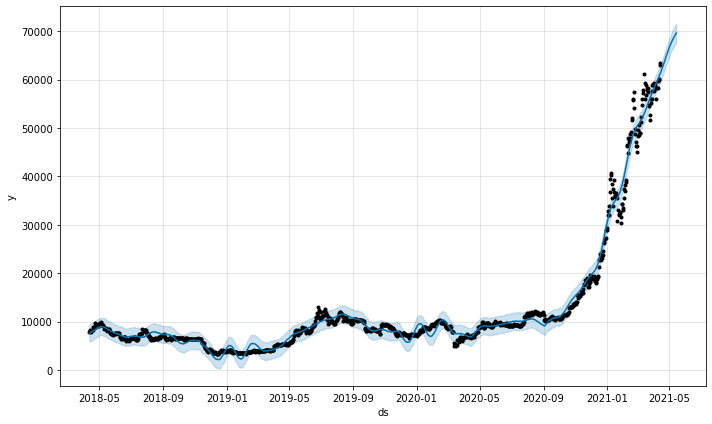

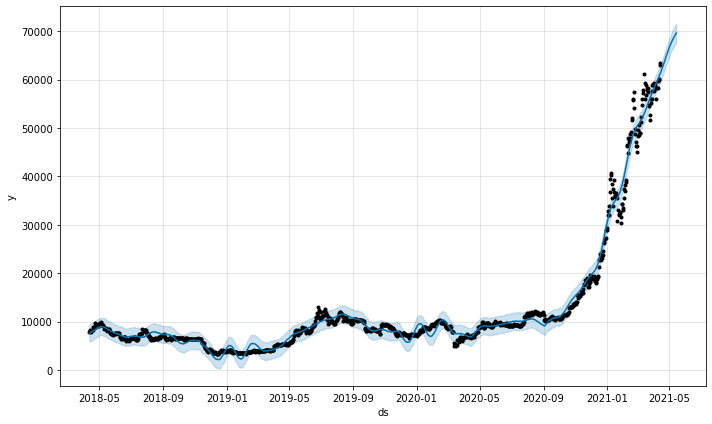

In [39]:
m.plot(forecast)

### Tuning des hyperparamètres:

Selon la documentation de Prophet, les bons paramètres à optimiser ici sont changepoint_prior_scale et seasonality_prior_scale qui donnent respectivement les fléxibilités de la composante tendancielle et saisonnières:

In [22]:
df_res=pd.DataFrame({'a':[], 'b':[], 'c':[] ,'mean_error':[],'rmse':[]})
#ti=t.clock()
for a in [0.01, 0.1, 1.0, 10.0, 14, 20]:
    for c in [0.001, 0.01, 0.1,0.2, 0.5]:
        m = pht.Prophet(yearly_seasonality=False,daily_seasonality=True, seasonality_prior_scale=a, changepoint_prior_scale=c )
        m.fit(df)
        df_cv = cross_validation(m, period=10 , horizon=2) 
        df_perf = performance_metrics(df_cv)
        df_res = df_res.append({'a':a,'b':b,'c':c,'mean_error':df_perf["mape"].mean(),'rmse':df_perf["rmse"]} ,ignore_index=True)
                 
df_res.head()                            


INFO:fbprophet:Making 51 forecasts with cutoffs between 2021-02-21 23:59:59.999999998 and 2021-04-12 23:59:59.999999998


INFO:prophet:n_changepoints greater than number of observations. Using 5.


INFO:prophet:n_changepoints greater than number of observations. Using 6.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
INFO:prophet:n_changepoints greater than number of observations. Using 8.
INFO:prophet:n_changepoints greater than number of observations. Using 9.
INFO:prophet:n_changepoints greater than number of observations. Using 10.
INFO:prophet:n_changepoints greater than number of observations. Using 11.
INFO:prophet:n_changepoints greater than number of observations. Using 11.
INFO:prophet:n_changepoints greater than number of observations. Using 12.
INFO:prophet:n_changepoints greater than number of observations. Using 13.
INFO:prophet:n_changepoints greater than number of observations. Using 14.
INFO:prophet:n_changepoints greater than number of observations. Using 15.
INFO:prophet:n_changepoints greater than number of observations. Using 15.
INFO:prophet:n_changepoints gr

INFO:fbprophet:Making 51 forecasts with cutoffs between 2021-02-21 23:59:59.999999998 and 2021-04-12 23:59:59.999999998


INFO:prophet:n_changepoints greater than number of observations. Using 5.
INFO:prophet:n_changepoints greater than number of observations. Using 6.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
INFO:prophet:n_changepoints greater than number of observations. Using 8.
INFO:prophet:n_changepoints greater than number of observations. Using 9.
INFO:prophet:n_changepoints greater than number of observations. Using 10.
INFO:prophet:n_changepoints greater than number of observations. Using 11.
INFO:prophet:n_changepoints greater than number of observations. Using 11.
INFO:prophet:n_changepoints greater than number of observations. Using 12.
INFO:prophet:n_changepoints greater than number of observations. Using 13.
INFO:prophet:n_changepoints greater than number of observations. Using 14.
INFO:prophet:n_changepoints greater than number of observations. Using 15.
INFO:prophet:n_changepoints gre

INFO:fbprophet:Making 51 forecasts with cutoffs between 2021-02-21 23:59:59.999999998 and 2021-04-12 23:59:59.999999998


INFO:prophet:n_changepoints greater than number of observations. Using 5.
INFO:prophet:n_changepoints greater than number of observations. Using 6.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
INFO:prophet:n_changepoints greater than number of observations. Using 8.
INFO:prophet:n_changepoints greater than number of observations. Using 9.
INFO:prophet:n_changepoints greater than number of observations. Using 10.
INFO:prophet:n_changepoints greater than number of observations. Using 11.
INFO:prophet:n_changepoints greater than number of observations. Using 11.
INFO:prophet:n_changepoints greater than number of observations. Using 12.
INFO:prophet:n_changepoints greater than number of observations. Using 13.
INFO:prophet:n_changepoints greater than number of observations. Using 14.
INFO:prophet:n_changepoints greater than number of observations. Using 15.
INFO:prophet:n_changepoints gre

INFO:fbprophet:Making 51 forecasts with cutoffs between 2021-02-21 23:59:59.999999998 and 2021-04-12 23:59:59.999999998


INFO:prophet:n_changepoints greater than number of observations. Using 5.
INFO:prophet:n_changepoints greater than number of observations. Using 6.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
INFO:prophet:n_changepoints greater than number of observations. Using 8.
INFO:prophet:n_changepoints greater than number of observations. Using 9.
INFO:prophet:n_changepoints greater than number of observations. Using 10.
INFO:prophet:n_changepoints greater than number of observations. Using 11.
INFO:prophet:n_changepoints greater than number of observations. Using 11.
INFO:prophet:n_changepoints greater than number of observations. Using 12.
INFO:prophet:n_changepoints greater than number of observations. Using 13.
INFO:prophet:n_changepoints greater than number of observations. Using 14.
INFO:prophet:n_changepoints greater than number of observations. Using 15.
INFO:prophet:n_changepoints gre

INFO:fbprophet:Making 51 forecasts with cutoffs between 2021-02-21 23:59:59.999999998 and 2021-04-12 23:59:59.999999998


INFO:prophet:n_changepoints greater than number of observations. Using 5.
INFO:prophet:n_changepoints greater than number of observations. Using 6.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
INFO:prophet:n_changepoints greater than number of observations. Using 8.
INFO:prophet:n_changepoints greater than number of observations. Using 9.
INFO:prophet:n_changepoints greater than number of observations. Using 10.
INFO:prophet:n_changepoints greater than number of observations. Using 11.
INFO:prophet:n_changepoints greater than number of observations. Using 11.
INFO:prophet:n_changepoints greater than number of observations. Using 12.
INFO:prophet:n_changepoints greater than number of observations. Using 13.
INFO:prophet:n_changepoints greater than number of observations. Using 14.
INFO:prophet:n_changepoints greater than number of observations. Using 15.
INFO:prophet:n_changepoints gre

INFO:fbprophet:Making 51 forecasts with cutoffs between 2021-02-21 23:59:59.999999998 and 2021-04-12 23:59:59.999999998


INFO:prophet:n_changepoints greater than number of observations. Using 5.
INFO:prophet:n_changepoints greater than number of observations. Using 6.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
INFO:prophet:n_changepoints greater than number of observations. Using 8.
INFO:prophet:n_changepoints greater than number of observations. Using 9.
INFO:prophet:n_changepoints greater than number of observations. Using 10.
INFO:prophet:n_changepoints greater than number of observations. Using 11.
INFO:prophet:n_changepoints greater than number of observations. Using 11.
INFO:prophet:n_changepoints greater than number of observations. Using 12.
INFO:prophet:n_changepoints greater than number of observations. Using 13.
INFO:prophet:n_changepoints greater than number of observations. Using 14.
INFO:prophet:n_changepoints greater than number of observations. Using 15.
INFO:prophet:n_changepoints gre

INFO:fbprophet:Making 51 forecasts with cutoffs between 2021-02-21 23:59:59.999999998 and 2021-04-12 23:59:59.999999998


INFO:prophet:n_changepoints greater than number of observations. Using 5.
INFO:prophet:n_changepoints greater than number of observations. Using 6.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
INFO:prophet:n_changepoints greater than number of observations. Using 8.
INFO:prophet:n_changepoints greater than number of observations. Using 9.
INFO:prophet:n_changepoints greater than number of observations. Using 10.
INFO:prophet:n_changepoints greater than number of observations. Using 11.
INFO:prophet:n_changepoints greater than number of observations. Using 11.
INFO:prophet:n_changepoints greater than number of observations. Using 12.
INFO:prophet:n_changepoints greater than number of observations. Using 13.
INFO:prophet:n_changepoints greater than number of observations. Using 14.
INFO:prophet:n_changepoints greater than number of observations. Using 15.
INFO:prophet:n_changepoints gre

INFO:fbprophet:Making 51 forecasts with cutoffs between 2021-02-21 23:59:59.999999998 and 2021-04-12 23:59:59.999999998


INFO:prophet:n_changepoints greater than number of observations. Using 5.
INFO:prophet:n_changepoints greater than number of observations. Using 6.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
INFO:prophet:n_changepoints greater than number of observations. Using 8.
INFO:prophet:n_changepoints greater than number of observations. Using 9.
INFO:prophet:n_changepoints greater than number of observations. Using 10.
INFO:prophet:n_changepoints greater than number of observations. Using 11.
INFO:prophet:n_changepoints greater than number of observations. Using 11.
INFO:prophet:n_changepoints greater than number of observations. Using 12.
INFO:prophet:n_changepoints greater than number of observations. Using 13.
INFO:prophet:n_changepoints greater than number of observations. Using 14.
INFO:prophet:n_changepoints greater than number of observations. Using 15.
INFO:prophet:n_changepoints gre

INFO:fbprophet:Making 51 forecasts with cutoffs between 2021-02-21 23:59:59.999999998 and 2021-04-12 23:59:59.999999998


INFO:prophet:n_changepoints greater than number of observations. Using 5.
INFO:prophet:n_changepoints greater than number of observations. Using 6.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
INFO:prophet:n_changepoints greater than number of observations. Using 8.
INFO:prophet:n_changepoints greater than number of observations. Using 9.
INFO:prophet:n_changepoints greater than number of observations. Using 10.
INFO:prophet:n_changepoints greater than number of observations. Using 11.
INFO:prophet:n_changepoints greater than number of observations. Using 11.
INFO:prophet:n_changepoints greater than number of observations. Using 12.
INFO:prophet:n_changepoints greater than number of observations. Using 13.
INFO:prophet:n_changepoints greater than number of observations. Using 14.
INFO:prophet:n_changepoints greater than number of observations. Using 15.
INFO:prophet:n_changepoints gre

INFO:fbprophet:Making 51 forecasts with cutoffs between 2021-02-21 23:59:59.999999998 and 2021-04-12 23:59:59.999999998


INFO:prophet:n_changepoints greater than number of observations. Using 5.
INFO:prophet:n_changepoints greater than number of observations. Using 6.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
INFO:prophet:n_changepoints greater than number of observations. Using 8.
INFO:prophet:n_changepoints greater than number of observations. Using 9.
INFO:prophet:n_changepoints greater than number of observations. Using 10.
INFO:prophet:n_changepoints greater than number of observations. Using 11.
INFO:prophet:n_changepoints greater than number of observations. Using 11.
INFO:prophet:n_changepoints greater than number of observations. Using 12.
INFO:prophet:n_changepoints greater than number of observations. Using 13.
INFO:prophet:n_changepoints greater than number of observations. Using 14.
INFO:prophet:n_changepoints greater than number of observations. Using 15.
INFO:prophet:n_changepoints gre

INFO:fbprophet:Making 51 forecasts with cutoffs between 2021-02-21 23:59:59.999999998 and 2021-04-12 23:59:59.999999998


INFO:prophet:n_changepoints greater than number of observations. Using 5.
INFO:prophet:n_changepoints greater than number of observations. Using 6.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
INFO:prophet:n_changepoints greater than number of observations. Using 8.
INFO:prophet:n_changepoints greater than number of observations. Using 9.
INFO:prophet:n_changepoints greater than number of observations. Using 10.
INFO:prophet:n_changepoints greater than number of observations. Using 11.
INFO:prophet:n_changepoints greater than number of observations. Using 11.
INFO:prophet:n_changepoints greater than number of observations. Using 12.
INFO:prophet:n_changepoints greater than number of observations. Using 13.
INFO:prophet:n_changepoints greater than number of observations. Using 14.
INFO:prophet:n_changepoints greater than number of observations. Using 15.
INFO:prophet:n_changepoints gre

INFO:fbprophet:Making 51 forecasts with cutoffs between 2021-02-21 23:59:59.999999998 and 2021-04-12 23:59:59.999999998


INFO:prophet:n_changepoints greater than number of observations. Using 5.
INFO:prophet:n_changepoints greater than number of observations. Using 6.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
INFO:prophet:n_changepoints greater than number of observations. Using 8.
INFO:prophet:n_changepoints greater than number of observations. Using 9.
INFO:prophet:n_changepoints greater than number of observations. Using 10.
INFO:prophet:n_changepoints greater than number of observations. Using 11.
INFO:prophet:n_changepoints greater than number of observations. Using 11.
INFO:prophet:n_changepoints greater than number of observations. Using 12.
INFO:prophet:n_changepoints greater than number of observations. Using 13.
INFO:prophet:n_changepoints greater than number of observations. Using 14.
INFO:prophet:n_changepoints greater than number of observations. Using 15.
INFO:prophet:n_changepoints gre

INFO:fbprophet:Making 51 forecasts with cutoffs between 2021-02-21 23:59:59.999999998 and 2021-04-12 23:59:59.999999998


INFO:prophet:n_changepoints greater than number of observations. Using 5.
INFO:prophet:n_changepoints greater than number of observations. Using 6.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
INFO:prophet:n_changepoints greater than number of observations. Using 8.
INFO:prophet:n_changepoints greater than number of observations. Using 9.
INFO:prophet:n_changepoints greater than number of observations. Using 10.
INFO:prophet:n_changepoints greater than number of observations. Using 11.
INFO:prophet:n_changepoints greater than number of observations. Using 11.
INFO:prophet:n_changepoints greater than number of observations. Using 12.
INFO:prophet:n_changepoints greater than number of observations. Using 13.
INFO:prophet:n_changepoints greater than number of observations. Using 14.
INFO:prophet:n_changepoints greater than number of observations. Using 15.
INFO:prophet:n_changepoints gre

INFO:fbprophet:Making 51 forecasts with cutoffs between 2021-02-21 23:59:59.999999998 and 2021-04-12 23:59:59.999999998


INFO:prophet:n_changepoints greater than number of observations. Using 5.
INFO:prophet:n_changepoints greater than number of observations. Using 6.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
INFO:prophet:n_changepoints greater than number of observations. Using 8.
INFO:prophet:n_changepoints greater than number of observations. Using 9.
INFO:prophet:n_changepoints greater than number of observations. Using 10.
INFO:prophet:n_changepoints greater than number of observations. Using 11.
INFO:prophet:n_changepoints greater than number of observations. Using 11.
INFO:prophet:n_changepoints greater than number of observations. Using 12.
INFO:prophet:n_changepoints greater than number of observations. Using 13.
INFO:prophet:n_changepoints greater than number of observations. Using 14.
INFO:prophet:n_changepoints greater than number of observations. Using 15.
INFO:prophet:n_changepoints gre

INFO:fbprophet:Making 51 forecasts with cutoffs between 2021-02-21 23:59:59.999999998 and 2021-04-12 23:59:59.999999998


INFO:prophet:n_changepoints greater than number of observations. Using 5.
INFO:prophet:n_changepoints greater than number of observations. Using 6.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
INFO:prophet:n_changepoints greater than number of observations. Using 8.
INFO:prophet:n_changepoints greater than number of observations. Using 9.
INFO:prophet:n_changepoints greater than number of observations. Using 10.
INFO:prophet:n_changepoints greater than number of observations. Using 11.
INFO:prophet:n_changepoints greater than number of observations. Using 11.
INFO:prophet:n_changepoints greater than number of observations. Using 12.
INFO:prophet:n_changepoints greater than number of observations. Using 13.
INFO:prophet:n_changepoints greater than number of observations. Using 14.
INFO:prophet:n_changepoints greater than number of observations. Using 15.
INFO:prophet:n_changepoints gre

INFO:fbprophet:Making 51 forecasts with cutoffs between 2021-02-21 23:59:59.999999998 and 2021-04-12 23:59:59.999999998


INFO:prophet:n_changepoints greater than number of observations. Using 5.
INFO:prophet:n_changepoints greater than number of observations. Using 6.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
INFO:prophet:n_changepoints greater than number of observations. Using 8.
INFO:prophet:n_changepoints greater than number of observations. Using 9.
INFO:prophet:n_changepoints greater than number of observations. Using 10.
INFO:prophet:n_changepoints greater than number of observations. Using 11.
INFO:prophet:n_changepoints greater than number of observations. Using 11.
INFO:prophet:n_changepoints greater than number of observations. Using 12.
INFO:prophet:n_changepoints greater than number of observations. Using 13.
INFO:prophet:n_changepoints greater than number of observations. Using 14.
INFO:prophet:n_changepoints greater than number of observations. Using 15.
INFO:prophet:n_changepoints gre

INFO:fbprophet:Making 51 forecasts with cutoffs between 2021-02-21 23:59:59.999999998 and 2021-04-12 23:59:59.999999998


INFO:prophet:n_changepoints greater than number of observations. Using 5.
INFO:prophet:n_changepoints greater than number of observations. Using 6.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
INFO:prophet:n_changepoints greater than number of observations. Using 8.
INFO:prophet:n_changepoints greater than number of observations. Using 9.
INFO:prophet:n_changepoints greater than number of observations. Using 10.
INFO:prophet:n_changepoints greater than number of observations. Using 11.
INFO:prophet:n_changepoints greater than number of observations. Using 11.
INFO:prophet:n_changepoints greater than number of observations. Using 12.
INFO:prophet:n_changepoints greater than number of observations. Using 13.
INFO:prophet:n_changepoints greater than number of observations. Using 14.
INFO:prophet:n_changepoints greater than number of observations. Using 15.
INFO:prophet:n_changepoints gre

INFO:fbprophet:Making 51 forecasts with cutoffs between 2021-02-21 23:59:59.999999998 and 2021-04-12 23:59:59.999999998


INFO:prophet:n_changepoints greater than number of observations. Using 5.
INFO:prophet:n_changepoints greater than number of observations. Using 6.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
INFO:prophet:n_changepoints greater than number of observations. Using 8.
INFO:prophet:n_changepoints greater than number of observations. Using 9.
INFO:prophet:n_changepoints greater than number of observations. Using 10.
INFO:prophet:n_changepoints greater than number of observations. Using 11.
INFO:prophet:n_changepoints greater than number of observations. Using 11.
INFO:prophet:n_changepoints greater than number of observations. Using 12.
INFO:prophet:n_changepoints greater than number of observations. Using 13.
INFO:prophet:n_changepoints greater than number of observations. Using 14.
INFO:prophet:n_changepoints greater than number of observations. Using 15.
INFO:prophet:n_changepoints gre

INFO:fbprophet:Making 51 forecasts with cutoffs between 2021-02-21 23:59:59.999999998 and 2021-04-12 23:59:59.999999998


INFO:prophet:n_changepoints greater than number of observations. Using 5.
INFO:prophet:n_changepoints greater than number of observations. Using 6.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
INFO:prophet:n_changepoints greater than number of observations. Using 8.
INFO:prophet:n_changepoints greater than number of observations. Using 9.
INFO:prophet:n_changepoints greater than number of observations. Using 10.
INFO:prophet:n_changepoints greater than number of observations. Using 11.
INFO:prophet:n_changepoints greater than number of observations. Using 11.
INFO:prophet:n_changepoints greater than number of observations. Using 12.
INFO:prophet:n_changepoints greater than number of observations. Using 13.
INFO:prophet:n_changepoints greater than number of observations. Using 14.
INFO:prophet:n_changepoints greater than number of observations. Using 15.
INFO:prophet:n_changepoints gre

INFO:fbprophet:Making 51 forecasts with cutoffs between 2021-02-21 23:59:59.999999998 and 2021-04-12 23:59:59.999999998


INFO:prophet:n_changepoints greater than number of observations. Using 5.
INFO:prophet:n_changepoints greater than number of observations. Using 6.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
INFO:prophet:n_changepoints greater than number of observations. Using 8.
INFO:prophet:n_changepoints greater than number of observations. Using 9.
INFO:prophet:n_changepoints greater than number of observations. Using 10.
INFO:prophet:n_changepoints greater than number of observations. Using 11.
INFO:prophet:n_changepoints greater than number of observations. Using 11.
INFO:prophet:n_changepoints greater than number of observations. Using 12.
INFO:prophet:n_changepoints greater than number of observations. Using 13.
INFO:prophet:n_changepoints greater than number of observations. Using 14.
INFO:prophet:n_changepoints greater than number of observations. Using 15.
INFO:prophet:n_changepoints gre

INFO:fbprophet:Making 51 forecasts with cutoffs between 2021-02-21 23:59:59.999999998 and 2021-04-12 23:59:59.999999998


INFO:prophet:n_changepoints greater than number of observations. Using 5.
INFO:prophet:n_changepoints greater than number of observations. Using 6.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
INFO:prophet:n_changepoints greater than number of observations. Using 8.
INFO:prophet:n_changepoints greater than number of observations. Using 9.
INFO:prophet:n_changepoints greater than number of observations. Using 10.
INFO:prophet:n_changepoints greater than number of observations. Using 11.
INFO:prophet:n_changepoints greater than number of observations. Using 11.
INFO:prophet:n_changepoints greater than number of observations. Using 12.
INFO:prophet:n_changepoints greater than number of observations. Using 13.
INFO:prophet:n_changepoints greater than number of observations. Using 14.
INFO:prophet:n_changepoints greater than number of observations. Using 15.
INFO:prophet:n_changepoints gre

INFO:fbprophet:Making 51 forecasts with cutoffs between 2021-02-21 23:59:59.999999998 and 2021-04-12 23:59:59.999999998


INFO:prophet:n_changepoints greater than number of observations. Using 5.
INFO:prophet:n_changepoints greater than number of observations. Using 6.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
INFO:prophet:n_changepoints greater than number of observations. Using 8.
INFO:prophet:n_changepoints greater than number of observations. Using 9.
INFO:prophet:n_changepoints greater than number of observations. Using 10.
INFO:prophet:n_changepoints greater than number of observations. Using 11.
INFO:prophet:n_changepoints greater than number of observations. Using 11.
INFO:prophet:n_changepoints greater than number of observations. Using 12.
INFO:prophet:n_changepoints greater than number of observations. Using 13.
INFO:prophet:n_changepoints greater than number of observations. Using 14.
INFO:prophet:n_changepoints greater than number of observations. Using 15.
INFO:prophet:n_changepoints gre

INFO:fbprophet:Making 51 forecasts with cutoffs between 2021-02-21 23:59:59.999999998 and 2021-04-12 23:59:59.999999998


INFO:prophet:n_changepoints greater than number of observations. Using 5.
INFO:prophet:n_changepoints greater than number of observations. Using 6.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
INFO:prophet:n_changepoints greater than number of observations. Using 8.
INFO:prophet:n_changepoints greater than number of observations. Using 9.
INFO:prophet:n_changepoints greater than number of observations. Using 10.
INFO:prophet:n_changepoints greater than number of observations. Using 11.
INFO:prophet:n_changepoints greater than number of observations. Using 11.
INFO:prophet:n_changepoints greater than number of observations. Using 12.
INFO:prophet:n_changepoints greater than number of observations. Using 13.
INFO:prophet:n_changepoints greater than number of observations. Using 14.
INFO:prophet:n_changepoints greater than number of observations. Using 15.
INFO:prophet:n_changepoints gre

INFO:fbprophet:Making 51 forecasts with cutoffs between 2021-02-21 23:59:59.999999998 and 2021-04-12 23:59:59.999999998


INFO:prophet:n_changepoints greater than number of observations. Using 5.
INFO:prophet:n_changepoints greater than number of observations. Using 6.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
INFO:prophet:n_changepoints greater than number of observations. Using 8.
INFO:prophet:n_changepoints greater than number of observations. Using 9.
INFO:prophet:n_changepoints greater than number of observations. Using 10.
INFO:prophet:n_changepoints greater than number of observations. Using 11.
INFO:prophet:n_changepoints greater than number of observations. Using 11.
INFO:prophet:n_changepoints greater than number of observations. Using 12.
INFO:prophet:n_changepoints greater than number of observations. Using 13.
INFO:prophet:n_changepoints greater than number of observations. Using 14.
INFO:prophet:n_changepoints greater than number of observations. Using 15.
INFO:prophet:n_changepoints gre

INFO:fbprophet:Making 51 forecasts with cutoffs between 2021-02-21 23:59:59.999999998 and 2021-04-12 23:59:59.999999998


INFO:prophet:n_changepoints greater than number of observations. Using 5.
INFO:prophet:n_changepoints greater than number of observations. Using 6.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
INFO:prophet:n_changepoints greater than number of observations. Using 8.
INFO:prophet:n_changepoints greater than number of observations. Using 9.
INFO:prophet:n_changepoints greater than number of observations. Using 10.
INFO:prophet:n_changepoints greater than number of observations. Using 11.
INFO:prophet:n_changepoints greater than number of observations. Using 11.
INFO:prophet:n_changepoints greater than number of observations. Using 12.
INFO:prophet:n_changepoints greater than number of observations. Using 13.
INFO:prophet:n_changepoints greater than number of observations. Using 14.
INFO:prophet:n_changepoints greater than number of observations. Using 15.
INFO:prophet:n_changepoints gre

INFO:fbprophet:Making 51 forecasts with cutoffs between 2021-02-21 23:59:59.999999998 and 2021-04-12 23:59:59.999999998


INFO:prophet:n_changepoints greater than number of observations. Using 5.
INFO:prophet:n_changepoints greater than number of observations. Using 6.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
INFO:prophet:n_changepoints greater than number of observations. Using 8.
INFO:prophet:n_changepoints greater than number of observations. Using 9.
INFO:prophet:n_changepoints greater than number of observations. Using 10.
INFO:prophet:n_changepoints greater than number of observations. Using 11.
INFO:prophet:n_changepoints greater than number of observations. Using 11.
INFO:prophet:n_changepoints greater than number of observations. Using 12.
INFO:prophet:n_changepoints greater than number of observations. Using 13.
INFO:prophet:n_changepoints greater than number of observations. Using 14.
INFO:prophet:n_changepoints greater than number of observations. Using 15.
INFO:prophet:n_changepoints gre

INFO:fbprophet:Making 51 forecasts with cutoffs between 2021-02-21 23:59:59.999999998 and 2021-04-12 23:59:59.999999998


INFO:prophet:n_changepoints greater than number of observations. Using 5.
INFO:prophet:n_changepoints greater than number of observations. Using 6.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
INFO:prophet:n_changepoints greater than number of observations. Using 8.
INFO:prophet:n_changepoints greater than number of observations. Using 9.
INFO:prophet:n_changepoints greater than number of observations. Using 10.
INFO:prophet:n_changepoints greater than number of observations. Using 11.
INFO:prophet:n_changepoints greater than number of observations. Using 11.
INFO:prophet:n_changepoints greater than number of observations. Using 12.
INFO:prophet:n_changepoints greater than number of observations. Using 13.
INFO:prophet:n_changepoints greater than number of observations. Using 14.
INFO:prophet:n_changepoints greater than number of observations. Using 15.
INFO:prophet:n_changepoints gre

INFO:fbprophet:Making 51 forecasts with cutoffs between 2021-02-21 23:59:59.999999998 and 2021-04-12 23:59:59.999999998


INFO:prophet:n_changepoints greater than number of observations. Using 5.
INFO:prophet:n_changepoints greater than number of observations. Using 6.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
INFO:prophet:n_changepoints greater than number of observations. Using 8.
INFO:prophet:n_changepoints greater than number of observations. Using 9.
INFO:prophet:n_changepoints greater than number of observations. Using 10.
INFO:prophet:n_changepoints greater than number of observations. Using 11.
INFO:prophet:n_changepoints greater than number of observations. Using 11.
INFO:prophet:n_changepoints greater than number of observations. Using 12.
INFO:prophet:n_changepoints greater than number of observations. Using 13.
INFO:prophet:n_changepoints greater than number of observations. Using 14.
INFO:prophet:n_changepoints greater than number of observations. Using 15.
INFO:prophet:n_changepoints gre

INFO:fbprophet:Making 51 forecasts with cutoffs between 2021-02-21 23:59:59.999999998 and 2021-04-12 23:59:59.999999998


INFO:prophet:n_changepoints greater than number of observations. Using 5.
INFO:prophet:n_changepoints greater than number of observations. Using 6.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
INFO:prophet:n_changepoints greater than number of observations. Using 8.
INFO:prophet:n_changepoints greater than number of observations. Using 9.
INFO:prophet:n_changepoints greater than number of observations. Using 10.
INFO:prophet:n_changepoints greater than number of observations. Using 11.
INFO:prophet:n_changepoints greater than number of observations. Using 11.
INFO:prophet:n_changepoints greater than number of observations. Using 12.
INFO:prophet:n_changepoints greater than number of observations. Using 13.
INFO:prophet:n_changepoints greater than number of observations. Using 14.
INFO:prophet:n_changepoints greater than number of observations. Using 15.
INFO:prophet:n_changepoints gre

INFO:fbprophet:Making 51 forecasts with cutoffs between 2021-02-21 23:59:59.999999998 and 2021-04-12 23:59:59.999999998


INFO:prophet:n_changepoints greater than number of observations. Using 5.
INFO:prophet:n_changepoints greater than number of observations. Using 6.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
INFO:prophet:n_changepoints greater than number of observations. Using 8.
INFO:prophet:n_changepoints greater than number of observations. Using 9.
INFO:prophet:n_changepoints greater than number of observations. Using 10.
INFO:prophet:n_changepoints greater than number of observations. Using 11.
INFO:prophet:n_changepoints greater than number of observations. Using 11.
INFO:prophet:n_changepoints greater than number of observations. Using 12.
INFO:prophet:n_changepoints greater than number of observations. Using 13.
INFO:prophet:n_changepoints greater than number of observations. Using 14.
INFO:prophet:n_changepoints greater than number of observations. Using 15.
INFO:prophet:n_changepoints gre

,a,b,c,mean_error,rmse
0,0.01,1.0,0.001,1.297025,"0 0.444024 Name: rmse, dtype: float64"
1,0.01,1.0,0.010,1.353362,"0 0.43087 Name: rmse, dtype: float64"
2,0.01,1.0,0.100,1.358162,"0 0.427805 Name: rmse, dtype: float64"
3,0.01,1.0,0.200,1.361820,"0 0.42812 Name: rmse, dtype: float64"
4,0.01,1.0,0.500,1.366091,"0 0.428104 Name: rmse, dtype: float64"


In [24]:
best_hyper_v = df_res.iloc[ df_res[['mean_error']].idxmin() ]
print(best_hyper_v)                  
df_res.head()

      a    b      c  mean_error                                      rmse
0  0.01  1.0  0.001    1.297025  0    0.444024
Name: rmse, dtype: float64


,a,b,c,mean_error,rmse
0,0.01,1.0,0.001,1.297025,"0 0.444024 Name: rmse, dtype: float64"
1,0.01,1.0,0.010,1.353362,"0 0.43087 Name: rmse, dtype: float64"
2,0.01,1.0,0.100,1.358162,"0 0.427805 Name: rmse, dtype: float64"
3,0.01,1.0,0.200,1.361820,"0 0.42812 Name: rmse, dtype: float64"
4,0.01,1.0,0.500,1.366091,"0 0.428104 Name: rmse, dtype: float64"


##### On choisit donc désormais changepoint_prior_scale = 0.001 et seasonality_prior_scale = 0.01, qui sont les paramètres minimisant le Mean Absolute Percentage Error

# V. Optimisation selon la Théorie Moderne de Portefeuille de Markowitz 

In [1]:
import pandas_datareader as pdr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import ipywidgets as widgets
import seaborn as sn

In [2]:
from progressbar import ProgressBar


In [3]:
Cryptos=["ETH-USD","PPC-USD","BCH-USD","USDT-USD"]

In [74]:
start_date = pd.to_datetime('2018-04-25')
end_date = pd.to_datetime('2021-05-11')
dfex = pdr.DataReader('BTC-USD', 'yahoo', start_date, end_date)['Adj Close']
print(dfex.index)

DatetimeIndex(['2018-04-24', '2018-04-25', '2018-04-26', '2018-04-27',
               '2018-04-28', '2018-04-29', '2018-04-30', '2018-05-01',
               '2018-05-02', '2018-05-03',
               ...
               '2021-05-02', '2021-05-03', '2021-05-04', '2021-05-05',
               '2021-05-06', '2021-05-07', '2021-05-08', '2021-05-09',
               '2021-05-10', '2021-05-11'],
              dtype='datetime64[ns]', name='Date', length=1110, freq=None)


In [76]:
for Crypto in Cryptos:
    print(Crypto) 
    try :
        #Afin d'éviter les erreurs liées au possible manque de données de Yahoo Finance
        df1 = pdr.DataReader(Crypto, 'yahoo', start_date, end_date)['Adj Close'] 
        df[Crypto] = df1
    except:
        print("Not in the database...")

ETH-USD
PPC-USD
BCH-USD
USDT-USD


### Volatilité de la série des prix pondérée par les coefficients de notre portefeuille

In [27]:
def vol(df,pond):
    SeriePond = df.dot(pond)
    return(SeriePond.std())

In [28]:
vol(df,[0.25,0.25,.25,.25])

155.91280770943118

### Rendement de la série pondérée

In [78]:
def rend(df,pond):
    SeriePond = df.dot(pond)
    Diff=(SeriePond.iloc[-1]-SeriePond.iloc[0])
    return(float(Diff))

In [64]:
rend(df,[0.25,0.25,.25,.25])

480.47345450520515

### Création de portefeuilles aléatoires

In [109]:
vols=[]
rends=[]
ponds=[]

print("Finding Optimal Weighting : ")
pbar = ProgressBar()


for _ in pbar(range(100000)):
    k = np.random.uniform(low=0, high=1, size=(4,)) #Les coeff peut être negatifs de sorte à ce que l'on puisse aussi "shorter" les actifs
    k=k/sum(abs(k))
    
    
    
    vols.append(vol(df,k))
    rends.append(rend(df,k))
    ponds.append(k)
    
    

Finding Optimal Weighting : 


100% |########################################################################|


### Sélection du portefeuille optimale

In [95]:
Portfolios = pd.DataFrame({'Returns':rends, 'Risks':vols, 'Weighting':ponds})

In [96]:
Portfolios.Risks.mean()

171.33698428614431

In [97]:
Portfolios.sample(10)

,Returns,Risks,Weighting
39179,473.326230,160.597361,"[0.1570579080478455, 0.3208902743355214, 0.321..."
75707,163.307693,80.878341,"[0.056665024391238376, 0.5470547510249938, 0.2..."
90281,121.075722,156.698486,"[0.02399958264451639, -0.2456942734272506, -0...."
95851,594.861034,127.346445,"[0.17473017248353487, 0.18097411829752244, -0...."
58228,453.977491,89.871240,"[0.13411428575908452, -0.1612678216707104, -0...."
46572,920.982027,218.595417,"[0.29612704611782087, 0.1684713205742524, 0.23..."
75183,-886.978985,134.653306,"[-0.2706734849873697, 0.0699184858344692, 0.38..."
29230,593.317101,132.632164,"[0.17357043075127693, 0.04894057285057771, -0...."
5851,-746.260785,115.266759,"[-0.23044190048269142, 0.005812649902610955, 0..."
97749,-1758.857236,314.179076,"[-0.5524329338528281, 0.15751278411955189, 0.0..."


In [98]:
def GetOptimal(rends,vols,ponds,risk):
    Portfolios = pd.DataFrame({'Returns':rends, 'Risks':vols, 'Weighting':ponds})
    Portfolios = Portfolios.loc[Portfolios["Risks"]<=risk]
    
    MaxIndex = Portfolios['Returns'].idxmax()
    print(MaxIndex)
    OptimalLine=Portfolios.loc[MaxIndex]
    print(OptimalLine)
    return(OptimalLine["Weighting"])

In [99]:
print(GetOptimal(rends,vols,ponds,150))

63130
Returns                                                990.455
Risks                                                  149.884
Weighting    [0.3031533040502991, -0.019072368747892286, -0...
Name: 63130, dtype: object
[ 0.3031533  -0.01907237 -0.39069161  0.28708272]


## Fonction finale d'optimisation :

#### On donne à la fonction le Dataframe contenant les prix non différenciés et non normalisés ainsi que le risque maximale souhaité

In [107]:
def vol(df,pond):
    SeriePond = df.dot(pond)
    return(SeriePond.std())

def rend(df,pond):
    SeriePond = df.dot(pond)
    Diff=(SeriePond.iloc[-1]-SeriePond.iloc[0])/SeriePond.iloc[0]
    return(float(Diff))

def GetOptimal(rends,vols,ponds,risk):
    Portfolios = pd.DataFrame({'Returns':rends, 'Risks':vols, 'Weighting':ponds})
    Portfolios = Portfolios.loc[Portfolios["Risks"]<=risk]
    
    MaxIndex = Portfolios[['Returns']].idxmax()
    OptimalLine=Portfolios.loc[MaxIndex]
    print(OptimalLine)
    return(OptimalLine["Weighting"])

def OptimalPortfolio(df,risk):
    print("Finding Optimal Weighting : ")
    vols=[]
    rends=[]
    ponds=[]

    
    pbar = ProgressBar()


    for _ in pbar(range(100000)):
        k = np.random.uniform(low=0, high=1, size=(4,)) #Les coeff peut être negatifs de sorte à ce que l'on puisse aussi "shorter" les actifs
        k=k/sum(abs(k))


        vols.append(vol(df,k))
        rends.append(rend(df,k))
        ponds.append(k)
    
    
    plt.scatter(vols,rends,s=0.05)
    plt.xlabel('Risks')
    plt.ylabel('Returns')
    OptimalWeighting = GetOptimal(rends,vols,ponds,risk)
    return(OptimalWeighting)

Finding Optimal Weighting : 


100% |########################################################################|


        Returns      Risks                                          Weighting
49486  5.080938  81.835753  [0.1377622689568744, 0.12214253476637973, 9.26...


49486    [0.1377622689568744, 0.12214253476637973, 9.26...
Name: Weighting, dtype: object

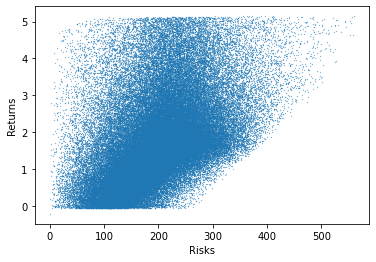

In [108]:
OptimalPortfolio(df,100)

# VI. Implémentation finale de la stratégie 

In [1]:
!pip install prophet

  Using cached prophet-1.0.1.tar.gz (65 kB)
  Created wheel for prophet: filename=prophet-1.0.1-py3-none-any.whl size=526435 sha256=caca67b2c7d30bfaf5ed14615889eba7a2650d665d89e202b0bc11d9fb08fe84
  Stored in directory: c:\users\samud\appdata\local\pip\cache\wheels\68\41\51\ce6539f488af8db6de0ebc548542f69ccc16963086998b2993
Successfully built prophet


In [2]:
!pip install mplfinance

In [172]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.


ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\samud\anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 437, in _error_catcher
    yield
  File "C:\Users\samud\anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 519, in read
    data = self._fp.read(amt) if not fp_closed else b""
  File "C:\Users\samud\anaconda3\lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 62, in read
    data = self.__fp.read(amt)
  File "C:\Users\samud\anaconda3\lib\http\client.py", line 458, in read
    n = self.readinto(b)
  File "C:\Users\samud\anaconda3\lib\http\client.py", line 502, in readinto
    n = self.fp.readinto(b)
  File "C:\Users\samud\anaconda3\lib\socket.py", line 669, in readinto
    return self._sock.recv_into(b)
  File "C:\Users\samud\anaconda3\lib\ssl.py", line 1241, in recv_into
    return self.read(nbytes, buffer)
  File "C:\Users\samud\anaconda3\lib\ssl.py", line 1099, in read
    return self._sslobj.read(len, buffer)
soc

### Importation des packages

In [149]:
import prophet as pht
import pandas_datareader as pdr
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import ipywidgets as widgets
import seaborn as sn
import mplfinance as mpl
from prophet.diagnostics import performance_metrics
from fbprophet.diagnostics import cross_validation
from prophet.plot import plot_cross_validation_metric
import time as t
from tqdm import tqdm

### Importation des données du BTC/USD dans le dataframe df puis calcul de la série différentielle normalisée

In [234]:

start_date = pd.to_datetime('2020-04-13')
end_date = pd.to_datetime('2021-04-13')


df = pdr.DataReader("ETH-USD",'yahoo',start_date,end_date)

df.reset_index(inplace=True)
df = df[['Adj Close','Date']]
df.rename({"Date": "ds", "Adj Close": "prix"},axis=1,inplace=True)
df['ds'] = df['ds'].apply(pd.to_datetime)
df['ynorm']=(df['prix']-df['prix'].mean())/df['prix'].std()
df['y']=df['ynorm'].diff()

print(np.shape(np.array(df.iloc[:10])))
print(df.head())


(10, 4)
         prix         ds     ynorm         y
0  156.279556 2020-04-12 -0.921851       NaN
1  157.596390 2020-04-13 -0.919695  0.002156
2  153.286896 2020-04-14 -0.926752 -0.007057
3  172.157379 2020-04-15 -0.895850  0.030901
4  186.914001 2020-04-17 -0.871686  0.024165


#### On définit le rendement relatif pour le calcul du profit

In [183]:

def rend_relatif(df,pond):
    SeriePond = df.dot(pond)
    Diff=(SeriePond.iloc[-1]-SeriePond.iloc[0])/SeriePond.iloc[0]
    return(float(Diff))



## Nouvelle optimisation plus efficace de Portfeuille grace aux "arrays" numpy 

In [247]:
# on construit les listes vols, rents et ponds par du calcul matriciel et du mapping de fonction sur matrice

def anx(x):
    return 1/x
v_anx=np.vectorize(anx)

def anx2(L):
    return(float(L[-1]-L[0]))

def anx3(L):
    return L.std()

#Attention modifier dans stratégie
def OptimalPortfolio2(df,risk):
    #on contruit des pondérations telle que la somme vaut 1
    A=np.random.rand(100000,4)
    B=v_anx(np.dot(A,np.ones(4))) 
    C=np.array([B,B,B,B])
    ponds=np.multiply(C.T,A)
    
    #on calcul les séries pondéré via la matrice SeriePond
    SeriePond=np.dot(ponds,np.array(df).T)
    
    # On map les fonctions auxiliaires sur les lignes de cette matrice pour calculer rends et vols
    rends=np.apply_along_axis(anx2, 1, SeriePond)
    vols=np.apply_along_axis(anx3, 1, SeriePond)


    OptimalWeighting = GetOptimal(rends,vols,list(ponds),risk)
    return(OptimalWeighting)


## On essaie notre stratégie de prédiction entre le 22 janvier et le 11 mai 2021 :

In [261]:
def strategie(start_date0, end_date0, start_date, a, b, c, periode, nb_periode, risk,k_journalie_investi):
    # start_date0 et end_date0 définissent l'interval temporel sur laquel on importe les données
    # a, b, c sont des hyperparamètre de prophète qui dans notre cas seront ceux trouvé par la crossvalidation
    # periode, nb_periode sont les durées de prise de positions et le nombre de cycle d'investissement
    # risk est le niveau de risque maximal pour le portefeuille: d'après le risque moyen on prendra en général plus de 200
    # k_journalie_investi est le capital investit à chaque cycle d'investissement 
    
    
    Cryptos = ["ETH-USD","PPC-USD","BCH-USD","USDT-USD"]
    L_df = [] #liste des dataframme associées aux différentes cryptos 
    LM_SD = [] #listes des couples de la forme (moyenne, écartype )
    
    #on initialise les données pour chaque Crypto
    for Crypto in Cryptos:
        df = pdr.DataReader(Crypto,'yahoo',start_date0,end_date0)
        df.reset_index(inplace=True)
        df = df[['Adj Close','Date']]
        df.rename({"Date": "ds", "Adj Close": "prix"},axis=1,inplace=True)
        df['ds'] = df['ds'].apply(pd.to_datetime)
        L_df.append(df)
    
    i0 = L_df[0].loc[L_df[0]["ds"]==start_date].index.to_numpy()[0] #indice de départ de l'étude 
    Erreur1 = 0
    
    L_Rends=[] #la liste des rendements 
    
    
    # On parcours chaque cycle d'investissment pendant lesquels on calcul le prix prédit par notre modèle 
    for i in range(nb_periode):
        
        df_v_prix=pd.DataFrame({'ETH-USD':[], 'PPC-USD':[], 'BCH-USD':[] ,'USDT-USD':[]})# stoque les variations de prix anticipées pour le calcul de des pondération 
        df_v_prix_réel=pd.DataFrame({'ETH-USD':[], 'PPC-USD':[], 'BCH-USD':[] ,'USDT-USD':[]})# stoque les variations de prix réel pour le calcul du profit
        L_prix=[] # liste des prix prédis 
        
        for j in range(len(L_df)):
            
            df=L_df[j]
            df2=df.iloc[:i0+i*periode]
            sd=df2['prix'].std()
            df2['y']=df2['prix'].diff()/sd #on normalise pour utiliser les mêmes hyparamètre pour chaque crypto
            
            m = pht.Prophet( yearly_seasonality=True, weekly_seasonality=True ,daily_seasonality=False, seasonality_prior_scale=a, holidays_prior_scale=b, changepoint_prior_scale=c )
            m.fit(df2)
            future = m.make_future_dataframe(periods=periode+2) #il y a 2jours qui sont à déduire (sinon il y a un décalage des dates)
            forecast = m.predict(future)
            
            #calcul du prix prédit
            v_diff = forecast["yhat"].iloc[-periode:].sum()
            v_prix = v_diff*sd     # on dénormalise
            
            prix_predit = v_prix + df.iloc[i0+(i)*(periode)]["prix"]
            
            L_prix.append( prix_predit )
            
            df_v_prix[Cryptos[j]]=df.iloc[:i0+(i)*(periode)+1]["prix"]
            df_v_prix_réel[Cryptos[j]]=df.iloc[:i0+(i+1)*(periode)+1]["prix"] 
            
        df_v_prix.loc[i0+(i+1)*periode]=L_prix # on ajoute les prix prédits 
        
        
        # On calcul alors le portefeuille optimal et le rendment du cycle avec les prix réels
        pond = np.array(OptimalPortfolio2( df_v_prix , risk )) # la pondération
        L_Rends.append(rend_relatif( df_v_prix_réel.iloc[i0+(i)*(periode):i0+(i+1)*(periode)+1] , pond ))
        
    # on calcul enfin le profit total de la stratégie
    Profit=sum(L_Rends)*k_journalie_investi
        
    return Profit
        
        
        
print(strategie('2021-01-22','2021-05-11','2021-03-26',0.01,1,0.1,1,8,300,10))


1.8338384721162873


#### L'ajout de paramètres de saisonnalité hebdomadaire et quotidienne dans Prophet nous permet aussi d'obtenir des rendements (relatifs) pouvant aller jusqu'à 30% et qui sont pour la majorité positifs sur un certain nombre d'essais

In [106]:
print(strategie('2018-04-25','2021-05-11','2018-07-05',0.1,10,0.01,1,1,70))

28.65921895572316
Fetching Optimal Portfolio: 


100% |########################################################################|


         Returns      Risks                                          Weighting
20444 -47.989919  32.644465  [0.202605984759751, -0.07236253368449631, 0.03...
14669 -97.107834  64.794225  [0.3683739130622339, -0.16184166551262177, 0.0...
42185 -60.267715  42.384721  [0.29974540212130923, -0.014473170727860014, 0...
41053 -75.646419  39.025606  [-0.12989941727432824, 0.2996689149196987, 0.1...
47149 -92.271073  49.530999  [-0.08109968696251987, 0.35104295850959916, 0....
69486  71.523787  35.141376  [0.19511159655584176, 0.6011719352296557, -0.1...
86656 -47.767539  36.419485  [0.32772112209862164, 0.060778180013162264, 0....
82660  51.619979  42.074547  [-0.4381615639444984, -0.34667140609624525, 0....
2174  -75.062121  51.220776  [0.32119906204801807, 0.28425978500944293, 0.0...
85989  59.174562  29.142178  [0.1588310252515231, 0.2875238854919275, -0.15...
Le rendement du portefeuille optimal est : 0.03608413893896468


In [108]:
print(strategie('2021-04-20','2021-05-11','2021-04-20',0.1,10,0.01,1,1,70))

INFO:prophet:n_changepoints greater than number of observations. Using 3.     |
INFO:prophet:n_changepoints greater than number of observations. Using 3.
INFO:prophet:n_changepoints greater than number of observations. Using 3.
INFO:prophet:n_changepoints greater than number of observations. Using 3.


213.8404191765165
Fetching Optimal Portfolio: 


100% |########################################################################|


         Returns      Risks                                          Weighting
42059  35.703414  41.936466  [0.3663258836683038, 0.3601116201202627, 0.265...
47103  23.659320  22.701085  [0.2088215847202772, 0.328147866032516, 0.1224...
7198   15.755931  13.730841  [-0.031765499846948826, 0.7296874482836938, -0...
89540   8.639946  36.729111  [0.2586789489716336, 0.38906089949281203, 0.33...
61837  25.787046  15.201445  [0.16023324532766747, 0.5944077726690632, 0.02...
54310  28.436767  34.305249  [0.2977826630059109, 0.17440988702735985, 0.22...
54724  29.098203  30.159510  [0.27190239844580943, 0.29393031117150453, 0.1...
82544 -25.176669  23.406816  [0.05991479163574048, 0.3443709787526891, 0.31...
62903   4.745144  35.345373  [0.23835380818003243, 0.15469995162857036, 0.3...
15925 -21.959913   7.258599  [-0.0747567153195192, 0.5014784497437196, 0.07...
Le rendement du portefeuille optimal est : 0.08331443525217276


In [114]:
print(strategie('2021-04-20','2021-05-11','2021-04-23',0.1,10,0.01,1,1,200))

INFO:prophet:n_changepoints greater than number of observations. Using 1.     |
INFO:prophet:n_changepoints greater than number of observations. Using 1.
INFO:prophet:n_changepoints greater than number of observations. Using 1.
INFO:prophet:n_changepoints greater than number of observations. Using 1.


239.99008551786736
Fetching Optimal Portfolio: 


100% |########################################################################|


          Returns      Risks  \
10646  -75.486355  30.824465   
40052 -145.701023  65.234975   
66595  -91.509871  36.252311   
28420  -77.349989  34.631154   
33787  -94.478863  38.215671   
39121 -153.220860  67.144766   
60021 -166.206036  68.607916   
88641 -190.040119  83.799628   
81989  -66.930602  27.975087   
4223   -69.196060  28.692808   

                                               Weighting  
10646  [0.11830071294600322, 0.41411873430041324, 0.2...  
40052  [0.38166371625886886, 0.06689915526060064, 0.2...  
66595  [0.09470550279690082, 0.1377101031093523, 0.36...  
28420  [0.20252285751379479, 0.385270225068258, 0.141...  
33787  [0.13449687229587512, 0.2996962451397633, 0.32...  
39121  [0.3685142475482238, 0.0638229148587414, 0.326...  
60021  [0.2855826626054269, 0.1853927270004392, 0.512...  
88641  [0.4690897712647054, 0.11909519061368253, 0.38...  
81989  [0.12564550649165018, 0.2902642088313288, 0.19...  
4223   [0.12294351697167595, 0.3561135129939519, 0.20... 

In [115]:
print(strategie('2021-04-24','2021-05-11','2021-04-26',0.1,10,0.01,1,1,200))

INFO:prophet:n_changepoints greater than number of observations. Using 0.     |
INFO:prophet:n_changepoints greater than number of observations. Using 0.
INFO:prophet:n_changepoints greater than number of observations. Using 0.
INFO:prophet:n_changepoints greater than number of observations. Using 0.


856.3594772788146
Fetching Optimal Portfolio: 


100% |########################################################################|


          Returns       Risks  \
64917  352.781575  163.034375   
42879  177.242278   83.790482   
19106  403.857070  185.276857   
5663   199.225332   90.566904   
1116   322.347130  150.444963   
41478  142.394186   68.357194   
18767  231.710507  109.057266   
65779  245.560542  111.153346   
40978  353.366865  164.768838   
54778  267.902035  126.087858   

                                               Weighting  
64917  [0.2075685980232488, 0.3674552371125737, 0.274...  
42879  [0.05182257413550062, 0.35108458074056087, 0.2...  
19106  [0.2786453230508601, 0.39280007570009023, 0.23...  
5663   [0.16381489877687425, 0.14442408296905646, 0.0...  
1116   [0.1472471970040748, 0.31045025452751435, 0.33...  
41478  [0.014966655269802938, 0.14663961793791308, 0....  
18767  [0.0807640583408627, 0.07831520159990628, 0.28...  
65779  [0.21771391755979508, 0.27231602687734247, 0.0...  
40978  [0.16575477873813507, 0.2702345813140293, 0.35...  
54778  [0.09336887271866853, 0.411719966214727

In [117]:
print(strategie('2020-08-24','2020-09-11','2020-08-26',0.1,10,0.01,1,1,200))

INFO:prophet:n_changepoints greater than number of observations. Using 0.     |
INFO:prophet:n_changepoints greater than number of observations. Using 0.
INFO:prophet:n_changepoints greater than number of observations. Using 0.
INFO:prophet:n_changepoints greater than number of observations. Using 0.


103.45860071203441
Fetching Optimal Portfolio: 


100% |########################################################################|


         Returns      Risks                                          Weighting
65083  10.033928   6.907803  [0.1632656031753763, 0.5763558611658781, 0.057...
54127  13.738404  10.030749  [0.2006953862493492, 0.2795784422467481, 0.193...
69781   8.099258   5.531408  [0.1336441417621858, 0.4958389480446091, 0.037...
14170  18.159511  12.786522  [0.28531166495780114, 0.44563339883968717, 0.1...
64161  21.459390  14.931291  [0.34587435171838554, 0.2918697735754051, 0.15...
54465  39.343516  27.258823  [0.6409193081149902, 0.08783595995402231, 0.24...
30656   8.715954   7.048811  [0.09823364731035275, 0.30509031320277796, 0.2...
98293  14.998571  10.947275  [0.21933539847097835, 0.2834256732080632, 0.21...
11190  16.173108  12.902311  [0.19141802146238512, 0.07892856279052164, 0.4...
72814  19.470134  14.291085  [0.28238668058884486, 0.08958067068304888, 0.2...
Le rendement du portefeuille optimal est : 0.20221757674542573


In [118]:
print(strategie('2019-08-24','2020-09-11','2019-08-26',0.1,10,0.01,1,1,200))

INFO:prophet:n_changepoints greater than number of observations. Using 0.     |
INFO:prophet:n_changepoints greater than number of observations. Using 0.
INFO:prophet:n_changepoints greater than number of observations. Using 0.
INFO:prophet:n_changepoints greater than number of observations. Using 0.


79.39675150636337
Fetching Optimal Portfolio: 


100% |########################################################################|


         Returns     Risks                                          Weighting
5223   15.003842  7.859228  [0.3171355084556493, 0.2881601090521421, 0.326...
85024  11.535652  6.309252  [0.44145125695743276, 0.21020489393446667, 0.1...
19349  13.421157  7.286449  [0.4750397179499486, 0.11785801212733354, 0.17...
97715  13.052085  6.793506  [0.2421560657097262, 0.09012963809992264, 0.30...
82801  13.234376  6.730064  [0.11767841094446453, 0.2895323306313215, 0.38...
16932  13.312203  6.929713  [0.24749443377644106, 0.24646287072377449, 0.3...
69309  11.672639  6.268671  [0.36309311730009525, 0.1473299706014281, 0.18...
25179  12.939340  6.830248  [0.31359298838764327, 0.31572627963231364, 0.2...
24353  17.239099  9.252697  [0.5327264846462282, 0.062576291045667, 0.2690...
58422  14.172097  7.227189  [0.1427816494697968, 0.3552438152706865, 0.406...
Le rendement du portefeuille optimal est : 0.0808498890884969


In [119]:
print(strategie('2020-10-01','2020-12-11','2020-12-03',0.1,10,0.01,1,1,200))

64.40841759101279
Fetching Optimal Portfolio: 


100% |########################################################################|


          Returns      Risks  \
42851   30.481256   9.388046   
8159    69.358216  21.876857   
62077   38.400384  12.532167   
7887    92.378475  28.934538   
78943  109.273191  33.838101   
22288   84.629709  26.229426   
52618   96.442834  29.446720   
66201   67.604324  21.392249   
1185    37.541004  12.706112   
12065   57.389160  18.428570   

                                               Weighting  
42851  [0.09618407756778047, 0.38459127991273956, 0.0...  
8159   [0.18825398650238107, 0.14017834387569536, 0.2...  
62077  [0.08528287845356285, 0.23943150145716677, 0.2...  
7887   [0.26160201954188456, 0.35720423594077394, 0.3...  
78943  [0.3323640603284591, 0.25801703199400544, 0.30...  
22288  [0.25596672130737746, 0.1845297534639373, 0.24...  
52618  [0.32375851660078925, 0.37046715990624074, 0.1...  
66201  [0.18003905104698414, 0.22875423043733198, 0.3...  
1185   [0.06650604590136644, 0.18436379858585245, 0.3...  
12065  [0.14020788008609608, 0.34565679746077926, 0.3... 

In [120]:
print(strategie('2018-10-01','2019-05-11','2018-10-03',0.1,10,0.01,1,1,200))

INFO:prophet:n_changepoints greater than number of observations. Using 0.     |
INFO:prophet:n_changepoints greater than number of observations. Using 0.
INFO:prophet:n_changepoints greater than number of observations. Using 0.
INFO:prophet:n_changepoints greater than number of observations. Using 0.


111.03570895937968
Fetching Optimal Portfolio: 


100% |########################################################################|


         Returns      Risks                                          Weighting
61291 -28.002740  12.707581  [0.7071754034268729, 0.05642890828474946, 0.10...
88199 -17.093907   8.182256  [0.06377981898769082, 0.36184525697157355, 0.1...
47708 -36.317160  17.160599  [0.3068718143514875, 0.20206431764363733, 0.28...
30537 -38.147872  18.361247  [0.06851344365620499, 0.25412701305992275, 0.3...
83329 -37.887605  18.089193  [0.1761740766627887, 0.39554387408052877, 0.33...
11660 -35.839049  16.908720  [0.3233129460302618, 0.2620315514664222, 0.279...
66163 -30.941904  14.855013  [0.08310042782680248, 0.3081278585504368, 0.28...
81341 -54.718873  26.231983  [0.17550587466196702, 0.11651297808753831, 0.5...
70281 -17.872247   8.293062  [0.27692910133241433, 0.3694093974044982, 0.11...
6109  -35.374258  16.934015  [0.1313389294345234, 0.1964976837987642, 0.321...
Le rendement du portefeuille optimal est : -0.06156256708715114


In [121]:
print(strategie('2018-10-01','2019-05-11','2018-10-03',0.1,10,0.01,1,1,200))

INFO:prophet:n_changepoints greater than number of observations. Using 0.     |
INFO:prophet:n_changepoints greater than number of observations. Using 0.
INFO:prophet:n_changepoints greater than number of observations. Using 0.
INFO:prophet:n_changepoints greater than number of observations. Using 0.


111.03570895937968
Fetching Optimal Portfolio: 


100% |########################################################################|


         Returns      Risks                                          Weighting
87174 -29.519564  13.866967  [0.3147764220308803, 0.27520378337896817, 0.21...
32881 -38.512973  18.374087  [0.18980199635712253, 0.15385096751479363, 0.3...
82057 -37.295535  17.642852  [0.29949616864265444, 0.1614806339238289, 0.29...
23369 -33.565990  15.824728  [0.31223999084699916, 0.14090709004686763, 0.2...
45096  -8.362328   3.779544  [0.22753559743899707, 0.1188171812399609, 0.02...
35548 -35.749421  16.820060  [0.3596597475644051, 0.27725199033453113, 0.26...
32687 -32.182327  15.537177  [0.023518768574595925, 0.3680636685883231, 0.3...
14037 -18.420478   8.437340  [0.3869304325929815, 0.08034002536115113, 0.08...
45785 -37.364845  17.890562  [0.1361881704673274, 0.10415521634332754, 0.34...
22730 -48.850420  23.219931  [0.3061968876963572, 0.12123692131015383, 0.41...
Le rendement du portefeuille optimal est : -0.0986182246372378


# Pistes d'améliorations

Premièrement, le tuning des hyperparamètres est très couteux en ressources, c'est pour cela que l'on s'est limité à trois seulement. Avec plus de temps et de moyen technique, il est fort problable que l'on trouve une modélisation plus efficace.

Deuxièmement, le calcul du portefeuille est assez brute de force, bien que l'on ait grandement réduit la complexité par du calcul matriciel. 
Cette étape peut être amélioré avec du calcul d'enveloppe convexe, et une méthode itérative d'optimisation convexe sous contrainte.

Ensuite on a observé pendant les essais que le procésseur est moyennement utilisé. On pourrait donc envisager du calcul en paralèlle pour améliorer les délais.

Enfin nous avons essayer un de mettre en place un affichage intelligent. Malheureusement le système utilisé (streamlit ) semble mal optimisé pour notre programme. Il serait donc intéressant de faire aboutir ce travail là. Vous pourrez tout de même observer les cours mais pour le reste de l'affichage, le calcul est trop ralenti par le système utilisé. 

## Procédure pour le streamlit

ouvrez le prompt ou shell de anaconda par exemple

installez les packages via les procédures:
pip install prophet
pip install mplfinance
pip install streamlit
pip install plotly
pip install stqdm

Puis téléchargez le fichier python envoyé avec le notebook st_strategie

Enfin dans le shell lancez la procédure:
streamlit run C:"chemin du fichier"\st_strategie.py --server.port "un port pas déja utilisé"

Il ne reste plus qu'à jouer avec les curseurs si le temps de calcul le permet.